# Information Value analysis with the **vivainsights** Python library

This notebook provides a demo on the Information Value (IV) functions for the **vivainsights** package. For more information about the package, please see:
- [Documentation](https://microsoft.github.io/vivainsights-py/)
- [GitHub Page](https://github.com/microsoft/vivainsights-py/)

In this notebook, we will demo how to create analysis and visualizations with the IV and plot-WOE queries from Viva Insights.

## Background

Information Value (IV) is a powerful methodology that provides a measure of the predictive power of an individual independent variable in relation to the dependent variable. In the context of Viva Insights, independent variables could be a collaboration metric (e.g. Emails sent, 1:1 meeting time with managers), whereas a dependent variable could be a categorical variable indicating whether a person is engaged, a top performer, or at risk of attrition - likely provided through a survey. 

IV quantifies the amount of information a variable provides about the outcome. It is based on the following logic: a variable that is highly informative of the outcome will have different distributions of values for different outcome classes. For example, if we are predicting employee engagement, a variable like collaboration hours might have a different distribution for the engaged and non-engaged classes, indicating that it is informative of the outcome.

The IV is calculated for each potential predictor variable, and the variables are then ranked based on their IVs. This allows for the selection of the most predictive variables for use in the model. The IV methodology solves the problem of selecting the most predictive variables for a predictive model. By ranking variables based on their IVs, it allows for the selection of variables that are most informative of the outcome, improving the predictive power of the model. It also helps in identifying and excluding variables that are not predictive of the outcome, which can improve model performance and interpretability.

## Set up

We start with loading the **vivainsights** package, and loading the default person query dataset with `load_pq_data()`:


In [1]:
import vivainsights as vi
import numpy as np

# load in-built datasets
pq_data = vi.load_pq_data() # load and assign in-built

The following shows a preview of the Person Query demo dataset: 

In [2]:
pq_data.head()

,Unnamed: 0,PersonId,MetricDate,After_hours_call_hours,After_hours_chat_hours,After_hours_collaboration_hours,After_hours_email_hours,After_hours_meeting_hours,After_hours_scheduled_call_hours,After_hours_unscheduled_call_hours,...,Working_hours_meeting_hours,Working_hours_scheduled_call_hours,Working_hours_unscheduled_call_hours,LevelDesignation,Layer,SupervisorIndicator,Organization,FunctionType,WeekendDays,IsActive
0,1,a6afe34c-8524-32d3-a368-1517b29b68cd,2022-05-01,0.0,0.0,18.675938,0.722722,18.25,0.0,0,...,19.50,0,0,Manager,3,Manager,Sales and Marketing,G_and_A,"[SUNDAY, SATURDAY]",True
1,2,d6368140-9312-380b-bbc9-9a32bcef4b83,2022-05-01,0.0,0.0,4.827803,0.925556,4.00,0.0,0,...,8.75,0,0,Support,3,Individual Contributor,Finance,Sales,"[SUNDAY, SATURDAY]",True
2,3,60bf99b0-65fd-3c3f-94fb-8ceb451d59e7,2022-05-01,0.0,0.0,1.497806,0.812806,0.75,0.0,0,...,12.50,0,0,Support,3,Individual Contributor,Product,IT,"[SUNDAY, SATURDAY]",True
3,4,93fddd74-3667-392b-ba5a-92d855772cb0,2022-05-01,0.0,0.0,59.265892,2.283668,59.00,0.0,0,...,28.50,0,0,Director,2,Manager+,Sales and Marketing,Analytics,"[SUNDAY, SATURDAY]",True
4,5,53183116-2cb2-32ee-9042-d62eb7061407,2022-05-01,0.0,0.0,2.146806,0.520167,1.75,0.0,0,...,7.50,0,0,Support,3,Individual Contributor,Sales and Marketing,IT,"[SUNDAY, SATURDAY]",True


## Calculating Information Value (IV)

To run the IV methodology, a binary dependent variable is required. 

We can simulate such a variable by the following, and in this example we can name the variable `IsLargeNetwork`:

In [3]:
pq_data["IsLargeNetwork"] = np.where(pq_data["Internal_network_size"] > 40, 1, 0)

We can then define a list of predictors, and assign this to `predictor_list`. 

As shown below, `create_IV()` is the primary function for analyzing and visualizing Information Value for a selected outcome variable. We use the `predictors` argument to supply the list of predictors, and `outcome` to specify which varible to use as the dependent variable. 

In `return_type`, we specify a plot to be returned:

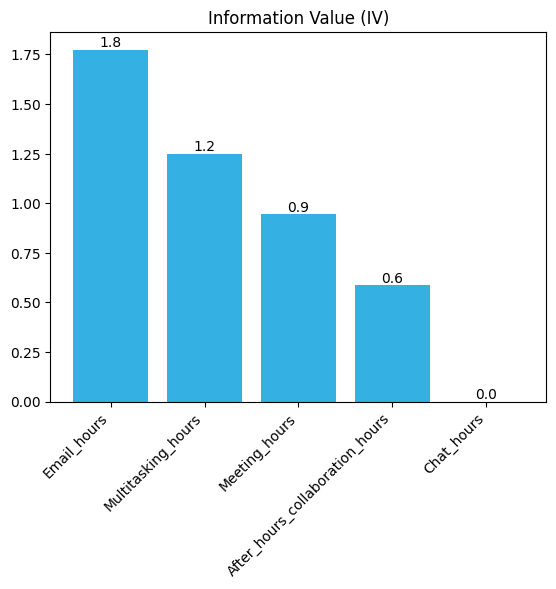

In [4]:
predictor_list = [
    "Email_hours",
    "Chat_hours",
    "Meeting_hours",
    "After_hours_collaboration_hours",
    "Multitasking_hours",
    "Meeting_and_call_hours_with_manager_1_1"
]


vi.create_IV(
    pq_data,
    predictors = predictor_list,
    outcome = "IsLargeNetwork",
    return_type = "plot"
    )

Here's a general guideline on how to interpret the IV values:

- IV < 0.02: The predictor is not useful for modeling (it has no predictive power).
- 0.02 <= IV < 0.1: The predictor has only a weak predictive power.
- 0.1 <= IV < 0.3: The predictor has a medium predictive power.
- 0.3 <= IV < 0.5: The predictor has a strong predictive power.
- IV >= 0.5: The predictor has a suspiciously high predictive power, and may potentially indicate overfitting. 

These are just guidelines and the thresholds can vary depending on the context and the specific problem you're working on. With real data, always consider the business context and use your judgement when interpreting the IV values. 

## Other return options

In total, there are five return options that can be supplied to `create_IV()`, via `return_type`: 

- "plot"
- "summary"
- "list"
- "plot-WOE"
- "IV"

The below shows the results when `return_type = 'summary'`, which returns a DataFrame containing one row per predictor and its associated IV and p-value:

In [5]:
vi.create_IV(
    pq_data,
    predictors = predictor_list,
    outcome = "IsLargeNetwork",
    return_type = "summary"
    )

,Variable,IV,pval
0,Email_hours,1.774995,0.000000
1,Multitasking_hours,1.248193,0.000000
2,Meeting_hours,0.944530,0.000000
3,After_hours_collaboration_hours,0.586598,0.000000
4,Chat_hours,0.000000,0.003346


It's also possible to return Weight of Evidence (WoE) as a plot too. The WoE for a given interval is calculated as the natural logarithm of the proportion of positive outcomes to the proportion of negative outcomes. In other words, it measures the evidence in favor of a particular outcome given the value of the independent variable.

Here is the output for `return_type = 'plot-WOE'`:

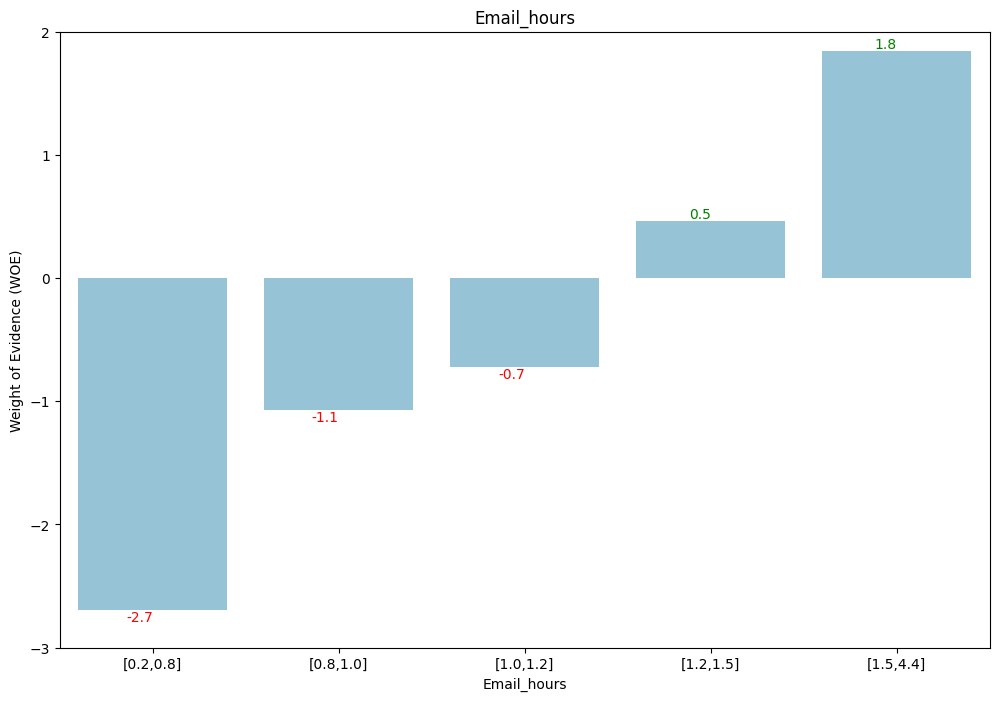

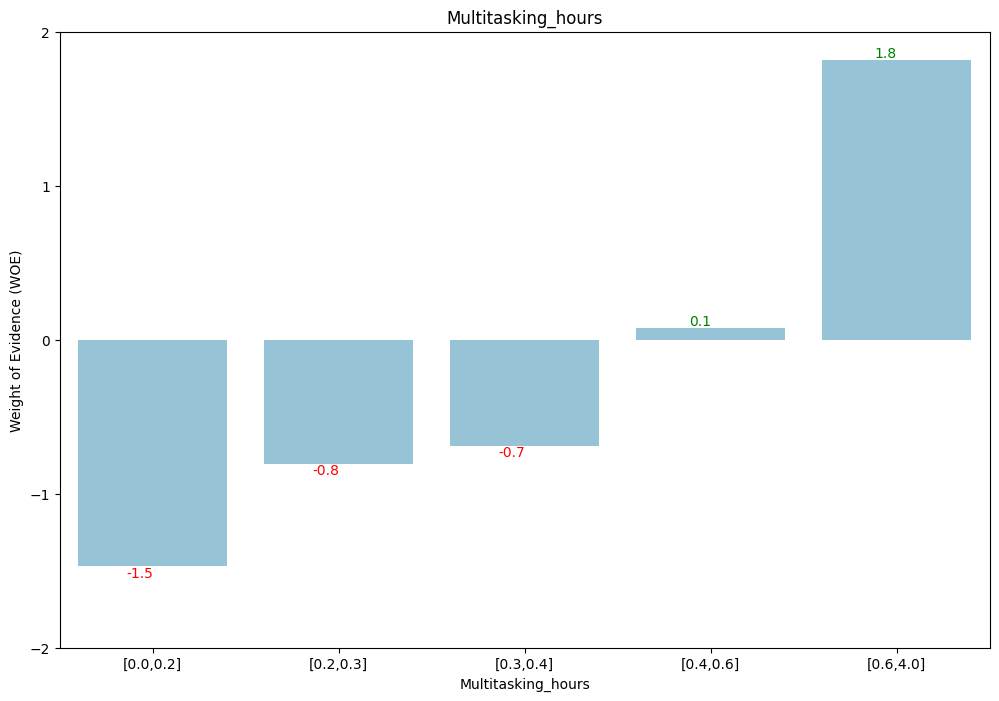

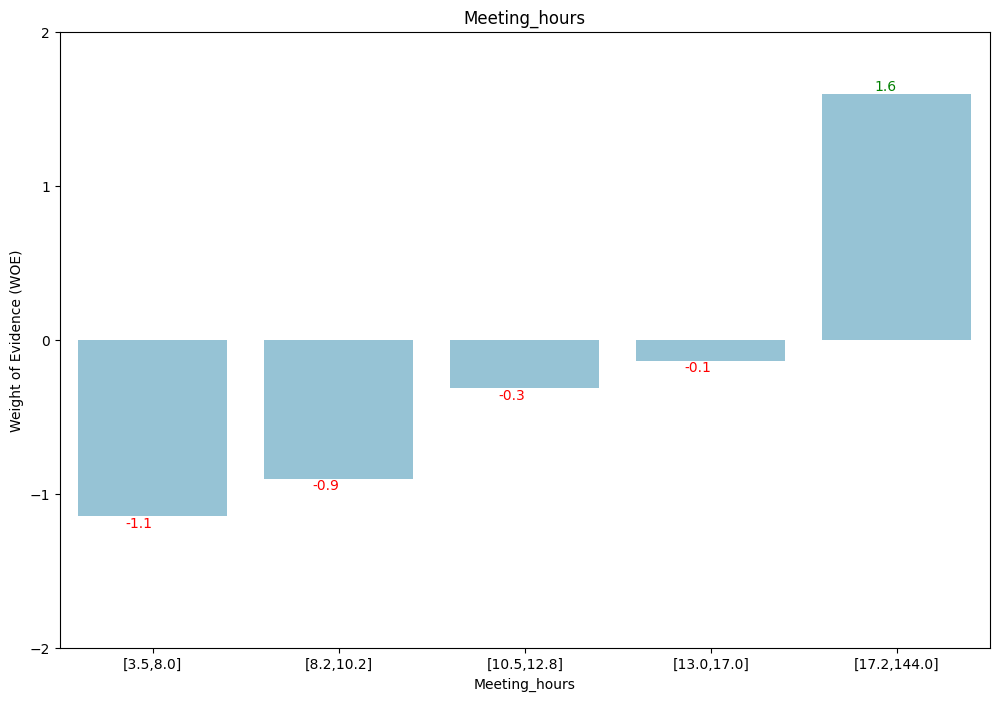

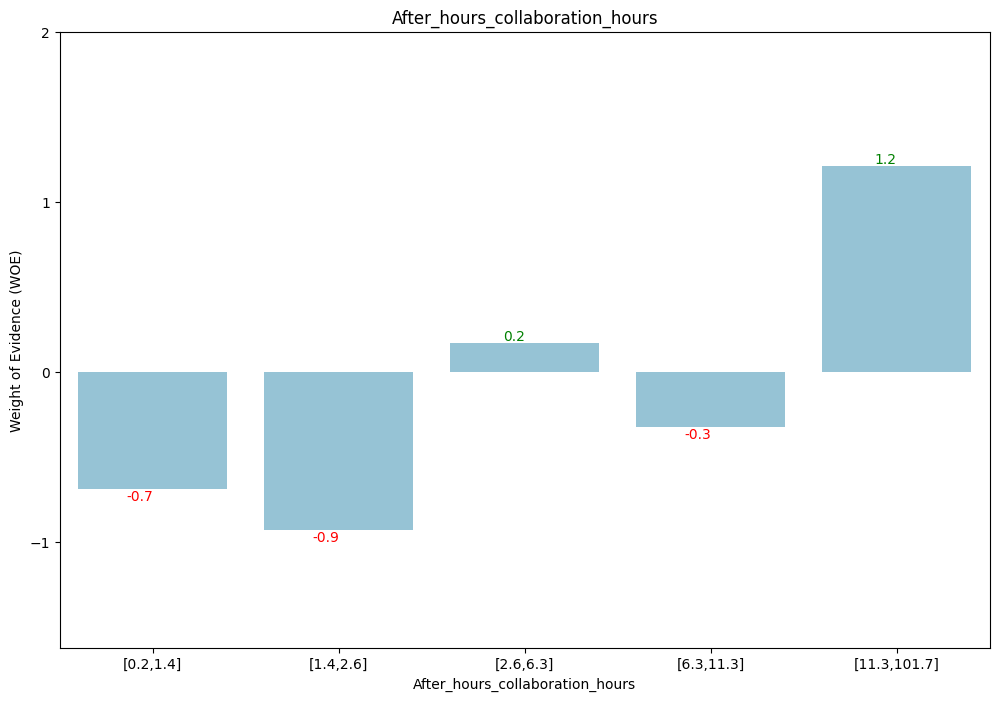

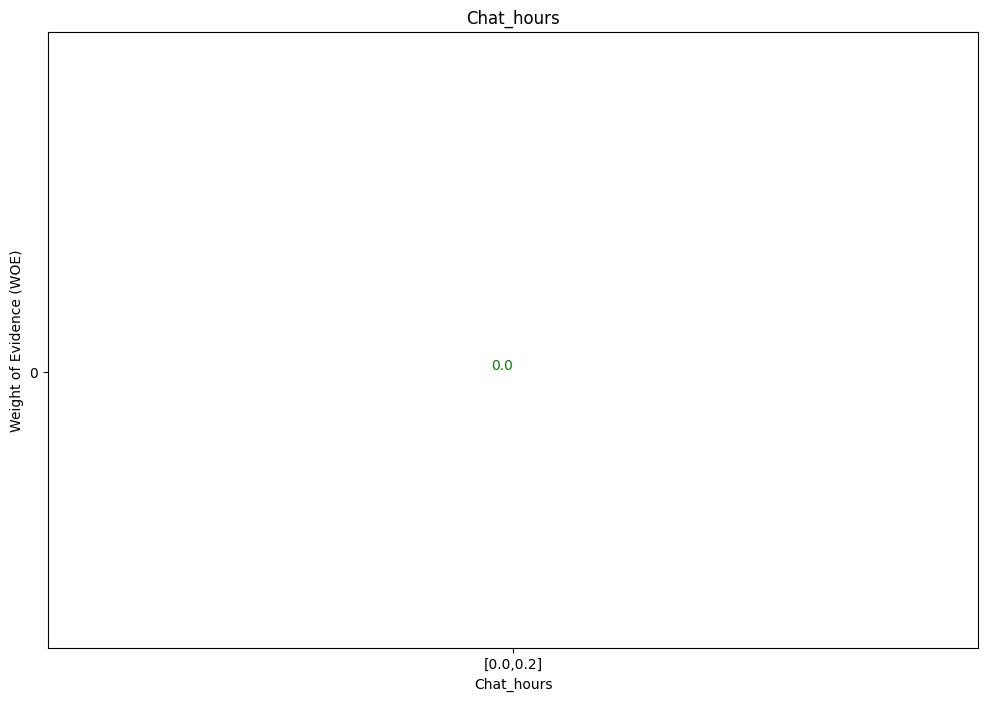

[None, None, None, None, None]

In [6]:
vi.create_IV(
    pq_data,
    predictors = predictor_list,
    outcome = "IsLargeNetwork",
    return_type = "plot-WOE"
    )

It's also possible to return more detailed outputs behind the calculations for `return_type = 'plot-WOE'`.

When `return_type = 'IV'`, a list of three items is printed AND returned. 

In [7]:
result_iv = vi.create_IV(
    pq_data,
    predictors = predictor_list,
    outcome = "IsLargeNetwork",
    return_type = "IV"
    )

The first item in the list output is a dictionary of data frames that contain information about WOE, IV, odds, and probabilities. 
The second item in the list output is a DataFrame of IV and p-value, identical to the output in `return_type = 'summary'`.
The third item in the list output is the natural log odds. 

You can extract them as follows: 

In [8]:
# Extract 'Email_hours' DataFrame from dictionary `result_iv[0]`:
result_iv[0]['Email_hours']

,Email_hours,n,percentage,WOE,IV,ODDS,PROB
0,"[0.2,0.8]",200,0.2,-2.694161,0.675652,0.025641,0.025
1,"[0.8,1.0]",200,0.2,-1.071255,0.847590,0.129944,0.115
2,"[1.0,1.2]",200,0.2,-0.726511,0.935044,0.183432,0.155
3,"[1.2,1.5]",200,0.2,0.458575,0.981046,0.600000,0.375
4,"[1.5,4.4]",200,0.2,1.840623,1.774995,2.389831,0.705


In [9]:
result_iv[1]

,Variable,IV,pval
0,Email_hours,1.774995,0.000000
1,Multitasking_hours,1.248193,0.000000
2,Meeting_hours,0.944530,0.000000
3,After_hours_collaboration_hours,0.586598,0.000000
4,Chat_hours,0.000000,0.003346


In [10]:
result_iv[2]

-0.9694005571881036

Here is a guide on interpreting WoE, odds, and probabilities: 
- A positive WoE value indicates that the odds of the event are higher for the group in question than for the entire dataset. In other words, the event is more likely to occur for this group.
- A negative WoE value indicates that the odds of the event are lower for the group in question than for the entire dataset. In other words, the event is less likely to occur for this group.
- A WoE of zero indicates that the odds of the event for the group are the same as for the entire dataset.

**Odds**: The odds of an event occurring is the ratio of the probability of the event occurring to the probability of the event not occurring. 

**Probability**: This is the likelihood of the event occurring, a value between 0 and 1. 

To return only this dictionary of DataFrames, you can also run `return_type = 'list'`, which returns the identical dictionary: 

In [11]:
result_iv_full = vi.create_IV(
    pq_data,
    predictors = predictor_list,
    outcome = "IsLargeNetwork",
    return_type = "list"
    )

In [12]:
result_iv_full['Email_hours']

,Email_hours,n,percentage,WOE,IV,ODDS,PROB
0,"[0.2,0.8]",200,0.2,-2.694161,0.675652,0.025641,0.025
1,"[0.8,1.0]",200,0.2,-1.071255,0.847590,0.129944,0.115
2,"[1.0,1.2]",200,0.2,-0.726511,0.935044,0.183432,0.155
3,"[1.2,1.5]",200,0.2,0.458575,0.981046,0.600000,0.375
4,"[1.5,4.4]",200,0.2,1.840623,1.774995,2.389831,0.705


## Notes 

### Additional arguments

There are two other arguments `create_IV()`, i.e. `siglevel` and `exc_sig` which controls whether significance results are shown in the outputs. These are optional. 

### Methodology choice

When contemplating whether to use the Information Value methodology, it's worth noting that WoE has several advantages:

1. It can transform a continuous variable into a set of categories, which can capture non-linear effects.
1. It creates monotonic variables, which are often better handled by some statistical models.
1. It allows you to compare the predictive power of variables from different scales and distributions.

### Function architecture

The `create_IV()` function calls a few other functions: 

  - `calculate_IV()`
  - `map_IV()`
  - `create_bar_asis()`
  - `p_test()`
